# Week1 - 熟悉91APP資料集(PromotionConditions)、pandas

## pandas
- read_csv() - 讀取csv資料
- head() - df列出前 5 筆資料 (默認)
- tail() - df列出後 5 筆資料 (默認)
    - 可以在括號中加任意數字來調整列出的數量。
    - ( Example: `head(10)` 將會列出前 10 筆資料 )
- shape -> 此df的(資料數目,變數數目)
- info() - 查看資料型態、欄位數目等等
- unique() - distinct
- to_datetime (str, format="")
    - astype(str) - 轉換資料成str
    - 以什麼format去讀取那行str
- 使用 loc() 方法透過 index 選取整行 row
    - ex: df.loc[3]會列出第4列

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../91APP/PromotionConditions.csv")

## 資料集欄位

|Columns|Meaning|
|:---:|:---:|
|PromotionId|活動編號|
|PromotionStartDateTime|活動開始時間|
|PromotionEndDateTime|活動結束時間|
|PromotionValidFlag|此活動是否合法|
|PromotionCondition_TotalPrice|折扣條件：滿額金額|
|PromotionCondition_DiscountRate|折扣條件：折扣折數|
|PromotionCondition_TotalQty|折扣條件：滿件條件|
|PromotionCondition_DiscountPrice|折扣條件：折扣金額 |
|DiscountType|折扣活動類型|

In [3]:
df.head()

,PromotionId,PromotionStartDateTime,PromotionEndDateTime,PromotionValidFlag,PromotionCondition_TotalPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalQty,PromotionCondition_DiscountPrice,DiscountType
0,3,2015-06-02 16:00:00.000,2015-07-10 13:00:00.000,True,0.0,0.0,2,398.0,任選優惠價
1,4,2015-06-02 17:00:00.000,2015-07-30 11:00:00.000,True,0.0,0.0,2,250.0,任選優惠價
2,5,2015-06-02 17:00:00.000,2015-07-10 13:00:00.000,True,0.0,0.0,2,299.0,任選優惠價
3,6,2015-06-09 10:30:00.000,2015-06-23 09:59:00.000,True,1000.0,0.0,0,100.0,滿額折現
4,7,2015-07-09 16:00:00.000,2015-08-31 11:00:00.000,True,0.0,0.0,2,299.0,任選優惠價


In [4]:
df.tail(10)

,PromotionId,PromotionStartDateTime,PromotionEndDateTime,PromotionValidFlag,PromotionCondition_TotalPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalQty,PromotionCondition_DiscountPrice,DiscountType
204,202,2017-11-15 11:00:00.000,2017-12-12 10:59:00.000,True,0.0,0.00,2,388.0,任選優惠價
205,203,2017-11-15 11:00:00.000,2017-11-30 10:59:00.000,True,800.0,0.00,0,100.0,滿額折現
206,203,2017-11-15 11:00:00.000,2017-11-30 10:59:00.000,True,1200.0,0.00,0,150.0,滿額折現
207,204,2017-11-15 11:00:00.000,2017-11-21 10:59:00.000,True,0.0,0.88,2,0.0,滿件打折
208,205,2017-11-17 11:00:00.000,2017-12-05 10:59:00.000,True,600.0,0.00,0,0.0,滿額贈
209,206,2017-11-17 11:00:00.000,2017-12-05 10:59:00.000,True,3500.0,0.00,0,0.0,滿額贈
210,207,2017-11-21 11:00:00.000,2017-11-28 10:59:00.000,True,0.0,0.88,2,0.0,滿件打折
211,223,2018-01-02 11:00:00.000,2018-01-03 15:00:00.000,True,0.0,0.45,2,0.0,滿件打折
212,224,2018-01-03 15:05:00.000,2018-01-08 11:29:00.000,True,0.0,0.85,2,0.0,滿件打折
213,225,2018-01-08 11:30:00.000,2018-01-17 10:59:00.000,True,0.0,0.85,2,0.0,滿件打折


In [5]:
df.shape

(214, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
PromotionId                         214 non-null int64
PromotionStartDateTime              214 non-null object
PromotionEndDateTime                214 non-null object
PromotionValidFlag                  214 non-null bool
PromotionCondition_TotalPrice       214 non-null float64
PromotionCondition_DiscountRate     214 non-null float64
PromotionCondition_TotalQty         214 non-null int64
PromotionCondition_DiscountPrice    214 non-null float64
DiscountType                        214 non-null object
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 13.7+ KB


### 把PromotionStartDateTime、PromotionEndDateTime格式都轉換為Datetime

In [7]:
df.PromotionStartDateTime = pd.to_datetime(df.PromotionStartDateTime.astype(str), format = '%Y-%m-%d %H:%M:%S.%f')
df.PromotionEndDateTime = pd.to_datetime(df.PromotionEndDateTime.astype(str), format = '%Y-%m-%d %H:%M:%S.%f')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
PromotionId                         214 non-null int64
PromotionStartDateTime              214 non-null datetime64[ns]
PromotionEndDateTime                214 non-null datetime64[ns]
PromotionValidFlag                  214 non-null bool
PromotionCondition_TotalPrice       214 non-null float64
PromotionCondition_DiscountRate     214 non-null float64
PromotionCondition_TotalQty         214 non-null int64
PromotionCondition_DiscountPrice    214 non-null float64
DiscountType                        214 non-null object
dtypes: bool(1), datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 13.7+ KB


In [9]:
df.head()

,PromotionId,PromotionStartDateTime,PromotionEndDateTime,PromotionValidFlag,PromotionCondition_TotalPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalQty,PromotionCondition_DiscountPrice,DiscountType
0,3,2015-06-02 16:00:00,2015-07-10 13:00:00,True,0.0,0.0,2,398.0,任選優惠價
1,4,2015-06-02 17:00:00,2015-07-30 11:00:00,True,0.0,0.0,2,250.0,任選優惠價
2,5,2015-06-02 17:00:00,2015-07-10 13:00:00,True,0.0,0.0,2,299.0,任選優惠價
3,6,2015-06-09 10:30:00,2015-06-23 09:59:00,True,1000.0,0.0,0,100.0,滿額折現
4,7,2015-07-09 16:00:00,2015-08-31 11:00:00,True,0.0,0.0,2,299.0,任選優惠價


### 看看DiscountType有幾項，作圖

In [10]:
df.DiscountType.unique()

array(['任選優惠價', '滿額折現', '滿件打折', '滿額贈', '滿額打折', '滿件折現', '會員滿額打折'],
      dtype=object)

In [11]:
data = df.groupby(by="DiscountType")["PromotionId"].count()
data.head()

DiscountType
任選優惠價     108
會員滿額打折      2
滿件打折       23
滿件折現        5
滿額打折        6
Name: PromotionId, dtype: int64

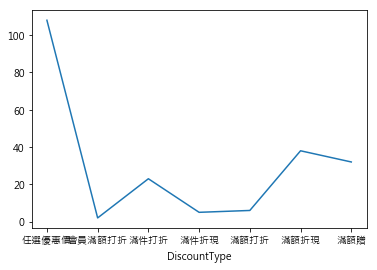

In [12]:
# 需要加底下這行才可以顯示圖出來
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data)
plt.xlabel('DiscountType')
plt.show()